<a href="https://colab.research.google.com/github/Frostkiller07/stock-price-analysis/blob/main/stock_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=360)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL',
                      start=start_date,
                      end=end_date,
                      progress=False)
print(data.head())

/tmp/ipython-input-3594011896.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL',


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2025-01-27  228.825089  231.104771  222.971558  223.011386   94863400
2025-01-28  237.187256  239.108574  229.770802  229.810630   75707600
2025-01-29  238.282303  238.780052  232.956385  233.065890   45486100
2025-01-30  236.520264  239.705853  236.141985  237.595403   55658300
2025-01-31  234.937439  246.077060  232.388967  246.077060  100959800


In [2]:
data["Date"] = data.index
data = data[["Date", "Open", "High",
             "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

Price        Date        Open        High         Low       Close     Volume
Ticker                   AAPL        AAPL        AAPL        AAPL       AAPL
0      2025-01-27  223.011386  231.104771  222.971558  228.825089   94863400
1      2025-01-28  229.810630  239.108574  229.770802  237.187256   75707600
2      2025-01-29  233.065890  238.780052  232.956385  238.282303   45486100
3      2025-01-30  237.595403  239.705853  236.141985  236.520264   55658300
4      2025-01-31  246.077060  246.077060  232.388967  234.937439  100959800


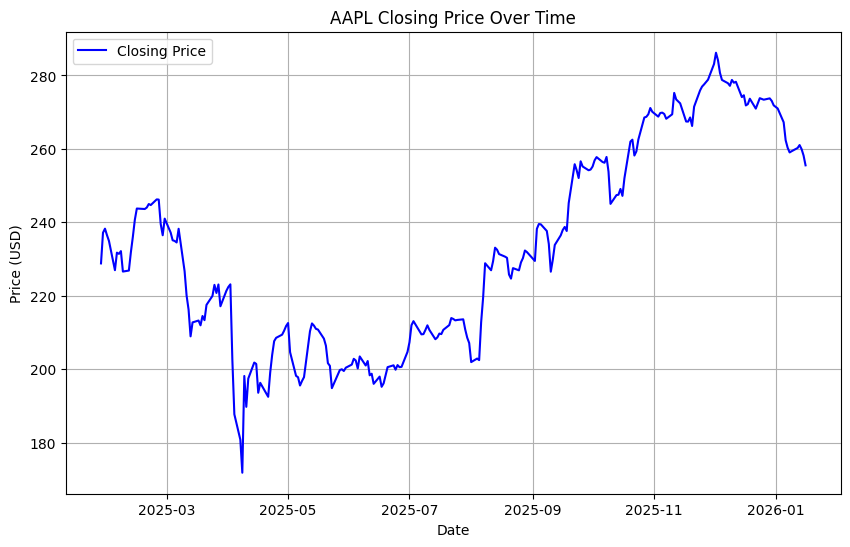

In [3]:
import matplotlib.pyplot as plt

# Plot the closing price trend
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


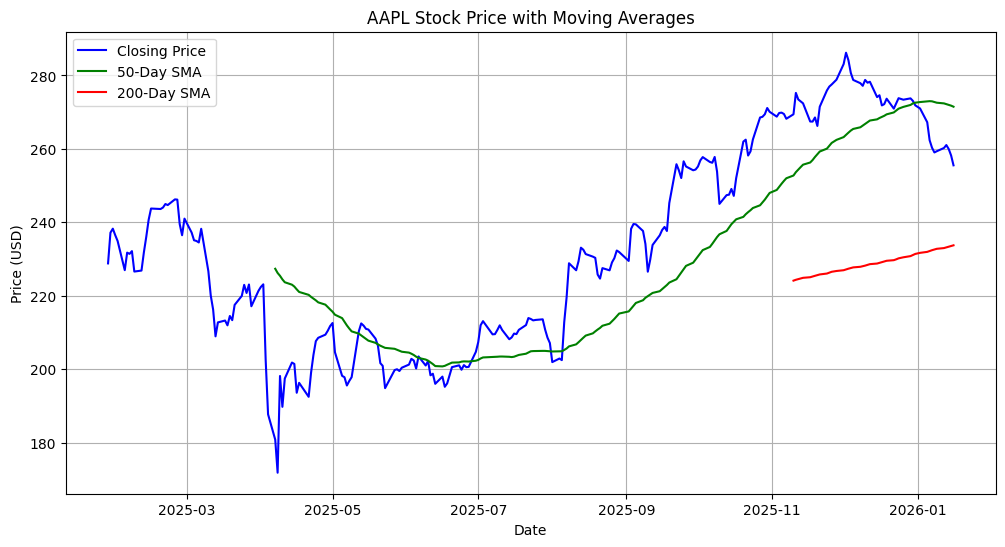

In [4]:
# Calculate moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Plot SMA with closing prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.plot(data['Date'], data['SMA_50'], label='50-Day SMA', color='green')
plt.plot(data['Date'], data['SMA_200'], label='200-Day SMA', color='red')
plt.title('AAPL Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


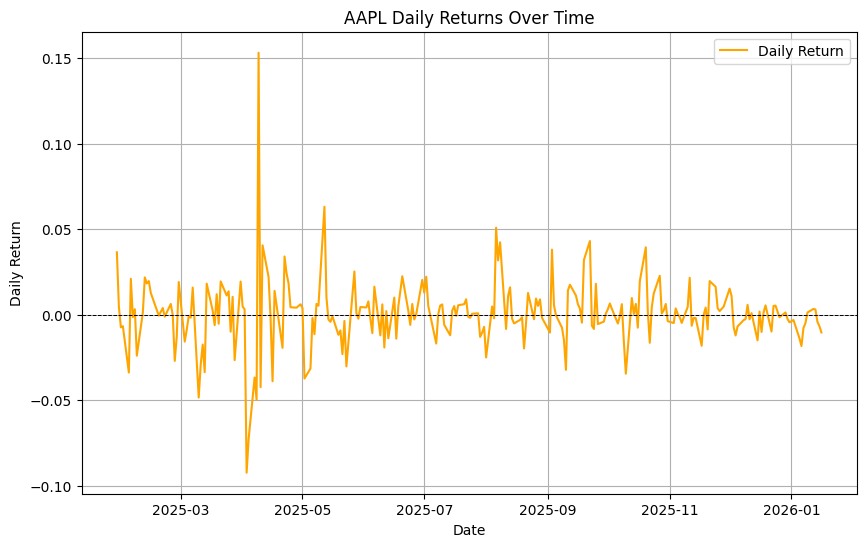

In [5]:
# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Daily Return'], label='Daily Return', color='orange')
plt.title('AAPL Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid()
plt.show()


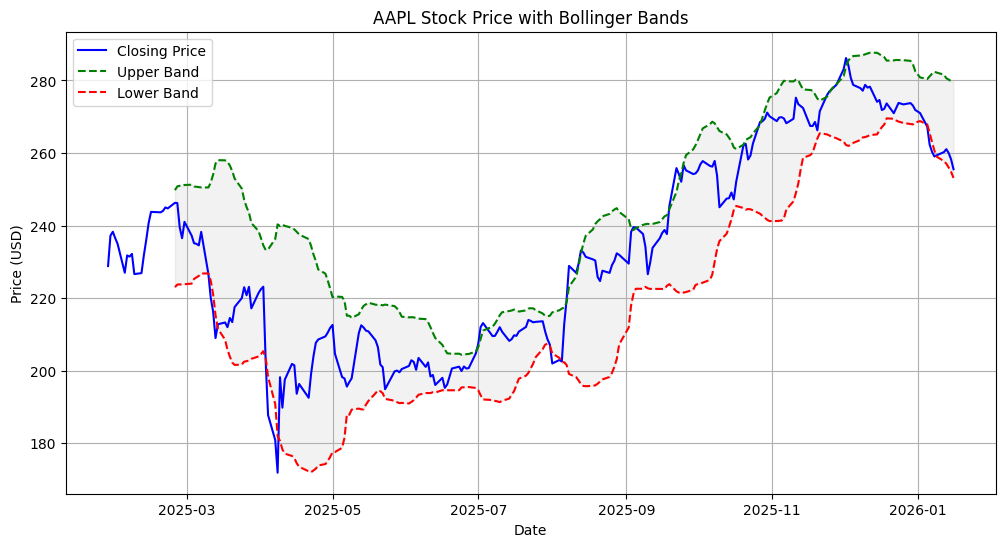

In [6]:
# Calculate Bollinger Bands
data['20 Day MA'] = data['Close'].rolling(window=20).mean()
data['20 Day STD'] = data['Close'].rolling(window=20).std()
data['Upper Band'] = data['20 Day MA'] + (2 * data['20 Day STD'])
data['Lower Band'] = data['20 Day MA'] - (2 * data['20 Day STD'])

# Plot Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.plot(data['Date'], data['Upper Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(data['Date'], data['Lower Band'], label='Lower Band', color='red', linestyle='--')
plt.fill_between(data['Date'], data['Upper Band'], data['Lower Band'], color='gray', alpha=0.1)
plt.title('AAPL Stock Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


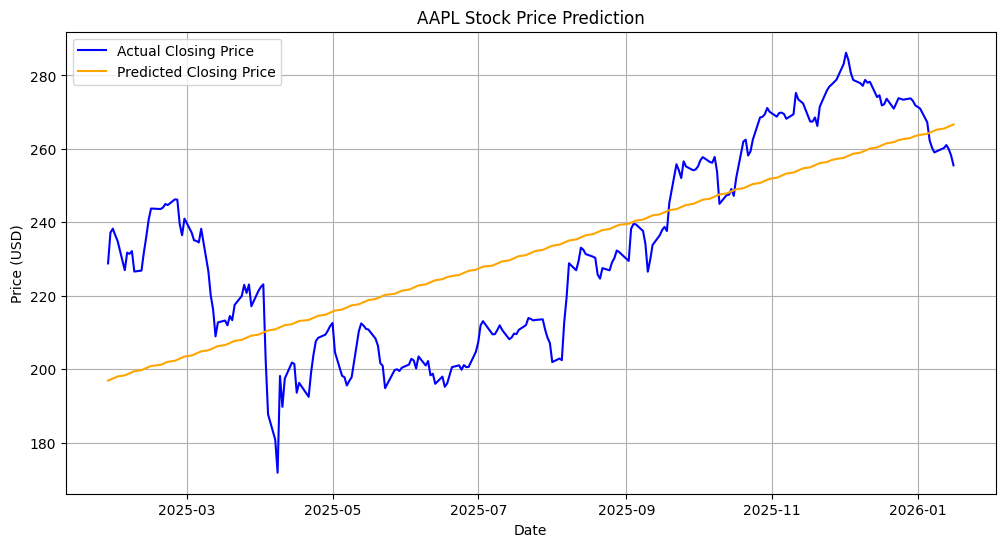

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for prediction (using only closing price and index as a feature)
data['Days'] = np.arange(len(data))
X = data[['Days']]
y = data['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
data['Predicted Close'] = model.predict(X)

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Actual Closing Price', color='blue')
plt.plot(data['Date'], data['Predicted Close'], label='Predicted Closing Price', color='orange')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


/tmp/ipython-input-2312823682.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-2312823682.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-2312823682.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date, progress=False)


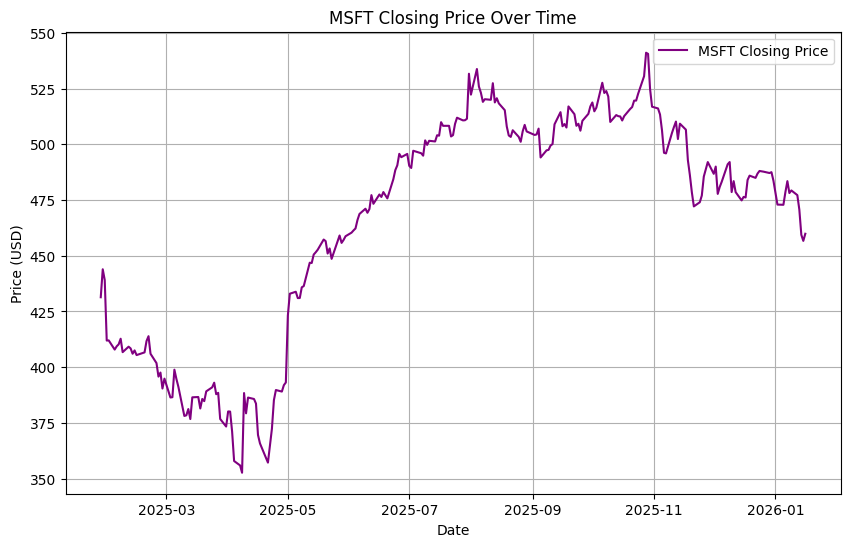

In [10]:
tickers = ['AAPL', 'MSFT', 'GOOG']
stock_data = {}

for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date, progress=False)
    stock_data[ticker]["Date"] = stock_data[ticker].index
    stock_data[ticker].reset_index(drop=True, inplace=True)

# Example: Visualize closing price
plt.figure(figsize=(10, 6))
plt.plot(stock_data['MSFT']['Date'], stock_data['MSFT']['Close'], label='MSFT Closing Price', color='purple')
plt.title('MSFT Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


In [11]:
pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=9413225eb99a122e21f252083f9cfa955004171e317afbf74445e20fac66cc4a
  Stored in directory: /root/.cache/pip/wheels/6e/62/11/dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


In [12]:
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Stock Price Analysis Report', 0, 1, 'C')

    def add_content(self, text):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, text)

pdf = PDF()
pdf.add_page()
pdf.add_content(f"Stock Analysis for AAPL from {start_date} to {end_date}")
pdf.add_content(f"\nSummary Statistics:\n{data[['Close', 'Volume']].describe()}")
pdf.output('Stock_Analysis_Report.pdf')


''